# this check the quality of the files that pass the criterion

In [1]:
# 1. path to data 
import glob
import pandas as pd
import json
import numpy as np

In [3]:
def getQualityDf(file_path, generation='gen1'):
    json_desp = file_path + '/summary/*.json'
    json_list = glob.glob(json_desp)
    
    file_names = []
    errs_interrupts_nums = []
    acc_overall_avgs = []
    quality_daylightSavingsCrossovers = []
    quality_goodCalibrations = []
    quality_goodWearTimes = []
    
    for my_file in json_list:
        with open(my_file) as f:
            data = json.load(f)

        file_names.append(data['file-name'])
        errs_interrupts_nums.append(data['errs-interrupts-num'])
        acc_overall_avgs.append(data['acc-overall-avg'])
        quality_daylightSavingsCrossovers.append(data['quality-daylightSavingsCrossover'])
        quality_goodCalibrations.append(data['quality-goodCalibration'])
        quality_goodWearTimes.append(data['quality-goodWearTime'])
    
    mydata = {"file_name": file_names,
         "errs_interrupts_num": errs_interrupts_nums,
         "acc_overall_avg": acc_overall_avgs,
         "quality_daylightSavingsCrossover": quality_daylightSavingsCrossovers,
         "quality_goodCalibration": quality_goodCalibrations,
         "quality_goodWearTime": quality_goodWearTimes}
    mydf = pd.DataFrame(mydata)
    mydf['generation'] = generation
    return mydf

In [4]:
data_path ='/well/doherty/projects/raine/gen1_26/gt3x/wrist/sleepOct20'
gen1df = getQualityDf(data_path, generation='gen1')

In [5]:
frames = [gen1df, gen2df]
allDF = pd.concat(frames, sort=True)

In [6]:
allDF = gen1df

# filter out that ones that do not pass the quality checks
1. generate summary statistics about the ones that don't pass 

In [7]:
allDF['quality_daylightSavingsCrossover'] = allDF['quality_daylightSavingsCrossover'].astype(bool)
allDF['quality_goodCalibration'] = allDF['quality_goodCalibration'].astype(bool)
allDF['quality_goodWearTime'] = allDF['quality_goodWearTime'].astype(bool)

In [8]:
allDF

,file_name,errs_interrupts_num,acc_overall_avg,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,generation
0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,81,7.11688,False,True,False,gen1
1,/well/doherty/projects/raine/gen1_26/gt3x/wris...,0,2.85697,False,True,False,gen1
2,/well/doherty/projects/raine/gen1_26/gt3x/wris...,0,3.84824,False,True,False,gen1
3,/well/doherty/projects/raine/gen1_26/gt3x/wris...,0,3.74058,False,True,False,gen1
4,/well/doherty/projects/raine/gen1_26/gt3x/wris...,56,7.34386,False,True,False,gen1
...,...,...,...,...,...,...,...
942,/well/doherty/projects/raine/gen1_26/gt3x/wris...,0,3.44070,False,True,False,gen1
943,/well/doherty/projects/raine/gen1_26/gt3x/wris...,0,2.10645,False,True,False,gen1
944,/well/doherty/projects/raine/gen1_26/gt3x/wris...,0,1.67172,False,True,False,gen1
945,/well/doherty/projects/raine/gen1_26/gt3x/wris...,0,4.21420,False,True,False,gen1


In [9]:
allDF['interrupts_num_ok'] = allDF['errs_interrupts_num'] == 0
allDF['acc_overall_avg_ok'] = allDF['acc_overall_avg'] <= 100
allDF['quality_goodCalibration']
allDF['quality_daylightSavingsCrossover']

0      False
1      False
2      False
3      False
4      False
       ...  
942    False
943    False
944    False
945    False
946    False
Name: quality_daylightSavingsCrossover, Length: 947, dtype: bool

In [10]:
allDF['quality_goodCalibration'].value_counts()

True     946
False      1
Name: quality_goodCalibration, dtype: int64

In [11]:
allDF['quality_daylightSavingsCrossover'].value_counts()

False    947
Name: quality_daylightSavingsCrossover, dtype: int64

In [12]:
allDF['quality_goodWearTime'].value_counts()

False    947
Name: quality_goodWearTime, dtype: int64

In [13]:
allDF['interrupts_num_ok'].value_counts()

True     925
False     22
Name: interrupts_num_ok, dtype: int64

In [14]:
allDF['acc_overall_avg_ok'].value_counts()

True    947
Name: acc_overall_avg_ok, dtype: int64

In [15]:
gen1df_full = allDF[allDF['generation'] == 'gen1']

In [15]:
gen1df_full = allDF[allDF['generation'] == 'gen1']
gen2df_full = allDF[allDF['generation'] == 'gen2']

In [17]:
gen1df_full['quality_goodWearTime'].value_counts()

True     985
False     54
Name: quality_goodWearTime, dtype: int64

In [19]:
gen2df_full['quality_goodWearTime'].value_counts()

True     539
False    351
Name: quality_goodWearTime, dtype: int64

In [18]:
passDFGen1 = gen1df_full[(gen1df_full['acc_overall_avg_ok'] & gen1df_full['interrupts_num_ok'] & gen1df_full['quality_goodCalibration'])]



In [20]:
passDFGen1.to_csv('/well/doherty/projects/raine/gen1_26/gt3x/wrist/sleepOct20/quality.csv')

In [37]:
non_passDFGen2 = gen2df_full[~(gen2df_full['acc_overall_avg_ok'] & gen2df_full['interrupts_num_ok'] &  gen2df_full['quality_goodWearTime'] & gen2df_full['quality_goodCalibration'])]
passDFGen2 = gen2df_full[(gen2df_full['acc_overall_avg_ok'] & gen2df_full['interrupts_num_ok'] &  gen2df_full['quality_goodWearTime'] & gen2df_full['quality_goodCalibration'])]


passDFGen2

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
2,22.71658,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
11,21.67594,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
15,23.33114,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
17,29.70843,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
18,24.12771,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...
876,31.64618,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
877,20.82818,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
881,22.00981,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True
888,24.44832,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,True,True


In [50]:
non_passDFGen2

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
0,49.42321,258,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
1,51.34072,139,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
3,39.04724,461,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
9,26.78790,784,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,False,True
16,36.38511,666,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
874,19.84819,105,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
878,32.12641,108,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
882,17.23105,204,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
883,20.93450,109,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True


In [38]:
non_passDFGen2 =  gen2df_full[~(gen2df_full['interrupts_num_ok'] )]
passDFGen2 = gen2df_full[(gen2df_full['interrupts_num_ok'] )]


In [39]:
non_passDFGen2

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
0,49.42321,258,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
1,51.34072,139,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
3,39.04724,461,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
9,26.78790,784,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,False,True
16,36.38511,666,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
874,19.84819,105,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
878,32.12641,108,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
882,17.23105,204,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
883,20.93450,109,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True


In [38]:
passDFGen2.iloc[10]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/377870_wrist_2012-09-10.gt3x'

In [47]:
# raw look at 
non_passDFGen2.iloc[0]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/605065_wrist_2014-04-04.gt3x'

In [52]:
non_passDFGen2.iloc[5]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/133608_wrist_2012-10-02.gt3x'

In [49]:
non_passDFGen2.iloc[2]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/864012_wrist_2013-01-24.gt3x'

In [16]:
raw_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/raw/605065_wrist_2014-04-04.csv.gz'
epoch_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/epoch/605065_wrist_2014-04-04-epoch.csv.gz'
rawDF = pd.read_csv(raw_dir,compression='gzip', skiprows= 189000, nrows=90000)

In [103]:
epochDF[212:218]

,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,xStd,yStd,...,vmfft9,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples
time,,,,,,,,,,,,,,,,,,,,,
2014-04-04 13:05:30.033000+08:00,0.003181,0.003429,-0.413184,-0.148877,0.901654,0.034619,0.015070,0.049049,0.002451,0.001322,...,0.000044,0.000040,0.000036,0.000032,1.0,900,1,0,0,271
2014-04-04 13:09:30.033000+08:00,0.002441,0.057002,-0.408013,-0.038457,0.854227,0.281487,0.194893,0.246247,0.024556,0.017961,...,0.000132,0.000118,0.000106,0.000095,1.0,900,0,0,0,181
2014-04-04 13:10:00.033000+08:00,0.024382,0.039352,-0.854231,0.240834,0.032605,2.192021,2.448211,3.147144,0.224709,0.206137,...,0.002484,0.001988,0.002217,0.001435,1.0,900,1,0,0,871
2014-04-04 13:19:00.033000+08:00,0.065787,0.120026,-0.663765,0.442360,-0.115114,4.783288,3.893830,5.012802,0.445727,0.244945,...,0.003260,0.003234,0.003265,0.003239,1.0,900,0,0,0,271
2014-04-04 13:19:30.033000+08:00,0.002467,0.003675,0.039023,0.939835,-0.339474,0.534114,0.422583,0.539157,0.031406,0.024806,...,0.000002,0.000001,0.000003,0.000006,1.0,900,1,0,0,361
2014-04-04 13:41:00.033000+08:00,0.006464,0.023064,-0.172431,0.608186,-0.602239,1.261976,0.943320,1.356238,0.310678,0.278416,...,0.000524,0.000488,0.000463,0.000446,1.0,900,1,0,0,480


In [108]:
rawDF[1800:4000]

,2014-04-04 13:04:30.000+0800 [Australia/Perth],-0.404,-0.140,0.901
1800,2014-04-04 13:05:30.033+0800 [Australia/Perth],-0.410,-0.152,0.898
1801,2014-04-04 13:05:30.066+0800 [Australia/Perth],-0.404,-0.155,0.898
1802,2014-04-04 13:05:30.100+0800 [Australia/Perth],-0.410,-0.152,0.904
1803,2014-04-04 13:05:30.133+0800 [Australia/Perth],-0.413,-0.149,0.904
1804,2014-04-04 13:05:30.166+0800 [Australia/Perth],-0.405,-0.149,0.904
...,...,...,...,...
3995,2014-04-04 13:10:13.200+0800 [Australia/Perth],-0.946,0.293,0.023
3996,2014-04-04 13:10:13.233+0800 [Australia/Perth],-0.949,0.296,0.023
3997,2014-04-04 13:10:13.266+0800 [Australia/Perth],-0.952,0.294,0.023
3998,2014-04-04 13:10:13.300+0800 [Australia/Perth],-0.952,0.293,0.017


In [17]:
epochDF = pd.read_csv(epoch_dir, index_col=['time'],
            parse_dates=['time'], date_parser=date_parser)

NameError: name 'date_parser' is not defined

In [91]:
epochNs = 30 * np.timedelta64(1, 's')
RawInterrupts = np.where(rawDF.index.to_series().diff() > epochNs)[0]
epochInterrupts = np.where(epochDF.index.to_series().diff() > epochNs)[0]


/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  
/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
210*30*30

189000

In [92]:
RawInterrupts

array([900])

,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,xStd,yStd,...,vmfft9,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples
time,,,,,,,,,,,,,,,,,,,,,
2014-04-04 13:05:30.033000+08:00,0.003181,0.003429,-0.413184,-0.148877,0.901654,0.034619,0.015070,0.049049,0.002451,0.001322,...,0.000044,0.000040,0.000036,0.000032,1.0,900,1,0,0,271
2014-04-04 13:09:30.033000+08:00,0.002441,0.057002,-0.408013,-0.038457,0.854227,0.281487,0.194893,0.246247,0.024556,0.017961,...,0.000132,0.000118,0.000106,0.000095,1.0,900,0,0,0,181
2014-04-04 13:10:00.033000+08:00,0.024382,0.039352,-0.854231,0.240834,0.032605,2.192021,2.448211,3.147144,0.224709,0.206137,...,0.002484,0.001988,0.002217,0.001435,1.0,900,1,0,0,871
2014-04-04 13:19:00.033000+08:00,0.065787,0.120026,-0.663765,0.442360,-0.115114,4.783288,3.893830,5.012802,0.445727,0.244945,...,0.003260,0.003234,0.003265,0.003239,1.0,900,0,0,0,271
2014-04-04 13:19:30.033000+08:00,0.002467,0.003675,0.039023,0.939835,-0.339474,0.534114,0.422583,0.539157,0.031406,0.024806,...,0.000002,0.000001,0.000003,0.000006,1.0,900,1,0,0,361
2014-04-04 13:41:00.033000+08:00,0.006464,0.023064,-0.172431,0.608186,-0.602239,1.261976,0.943320,1.356238,0.310678,0.278416,...,0.000524,0.000488,0.000463,0.000446,1.0,900,1,0,0,480


In [93]:
epochInterrupts

array([   1,  175,  213,  215,  217,  218,  221,  223,  224,  225,  227,
        253,  259,  261,  263,  264,  266,  268,  272,  279,  280,  281,
        287,  288,  290,  291,  295,  296,  297,  307,  309,  310,  327,
        328,  330,  331,  333,  335,  336,  346,  351,  354,  356,  358,
        359,  360,  367,  374,  376,  433,  446,  447,  467,  468,  476,
        495,  498,  503,  505,  506,  508,  544,  547,  548,  557,  559,
        578,  585,  604,  654,  664,  670,  671,  686,  792,  793,  795,
        796,  803,  805,  813,  815,  816,  817,  819,  824,  831,  836,
        838,  841,  851,  857,  858,  861,  863,  865,  886,  906,  908,
        909,  916,  918,  922,  923,  924,  925,  931,  933,  934,  935,
        937,  938,  948,  950,  954,  955,  956,  960,  963,  965,  968,
        970,  972,  973,  975,  983,  987,  994,  999, 1001, 2590, 2625,
       2754, 2944, 2948, 2949, 2951, 2952, 2954, 2959, 2961, 2962, 2964,
       2965, 2968, 2971, 2972, 2975, 2978, 2979, 29

In [79]:
raw_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/raw/864012_wrist_2013-01-24.csv.gz'
epoch_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/epoch/864012_wrist_2013-01-24-epoch.csv.gz'
rawDF = pd.read_csv(raw_dir,compression='gzip', index_col=['time'],
            parse_dates=['time'], date_parser=date_parser, nrows=90000)

In [80]:
rawDF

,x,y,z
time,,,
2013-01-24 20:13:02.033000+08:00,-0.069,-0.125,0.963
2013-01-24 20:13:02.066000+08:00,0.138,-0.259,0.937
2013-01-24 20:13:02.100000+08:00,-0.017,-0.186,0.930
2013-01-24 20:13:02.133000+08:00,0.068,-0.364,0.986
2013-01-24 20:13:02.166000+08:00,-0.145,0.136,0.882
...,...,...,...
2013-01-24 21:50:01.866000+08:00,-0.994,-0.127,-0.194
2013-01-24 21:50:01.900000+08:00,-0.991,-0.151,-0.173
2013-01-24 21:50:01.933000+08:00,-0.962,-0.157,-0.170


In [82]:
epochNs = 30 * np.timedelta64(1, 's')

interrupts = np.where(rawDF.index.to_series().diff() > epochNs)[0]


/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
epochDF.iloc[1:4]

,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,xStd,yStd,...,vmfft9,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples
time,,,,,,,,,,,,,,,,,,,,,
2013-01-24 20:13:32.033000+08:00,0.046060,0.075540,0.272535,0.534350,0.604190,2.977281,2.691767,4.017368,0.307657,0.390460,...,0.000699,0.000531,0.000404,0.000486,1.0,900,1,0,0,571
2013-01-24 20:17:32.033000+08:00,0.432334,0.434608,-0.348202,-0.035615,1.379296,1.249846,1.370354,1.802385,0.090436,0.083833,...,0.000016,0.000016,0.000016,0.000016,1.0,900,0,0,0,31
2013-01-24 20:18:02.033000+08:00,0.029655,0.056015,0.246687,0.517066,0.796022,1.440905,1.551959,1.430289,0.091277,0.164824,...,0.000608,0.000094,0.000266,0.000973,1.0,900,0,0,0,902


In [87]:
rawDF.iloc[1799:1802]

,x,y,z
time,,,
2013-01-24 20:14:02+08:00,0.284,0.675,0.659
2013-01-24 20:17:32.033000+08:00,-0.361,-0.037,1.397
2013-01-24 20:17:32.066000+08:00,-0.361,-0.037,1.397


In [84]:
interrupts

array([ 1800,  4500,  8100, 10800, 16200, 18900, 21600, 29700, 39600,
       43200, 72900, 74700])

In [3]:
import re
import datetime


In [4]:
def date_parser(t):
    '''
    Parse date a date string of the form e.g.
    2020-06-14 19:01:15.123+0100 [Europe/London]
    '''
    tz = re.search(r'(?<=\[).+?(?=\])', t)
    if tz is not None:
        tz = tz.group()
    t = re.sub(r'\[(.*?)\]', '', t)
    return pd.to_datetime(t, utc=True).tz_convert(tz)


In [6]:
epoch_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/epoch/864012_wrist_2013-01-24-epoch.csv.gz'
epoch_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/epoch/133608_wrist_2012-10-02-epoch.csv.gz'


epoch_dir = '/well/doherty/projects/raine/gen1_26/gt3x/wrist/baseline_oct8/epoch/920185_wrist_2016-10-17-epoch.csv.gz'



epochDF = pd.read_csv(epoch_dir, index_col=['time'],
            parse_dates=['time'], date_parser=date_parser)

In [7]:
epochNs = 30 * np.timedelta64(1, 's')

interrupts = np.where(epochDF.index.to_series().diff() > epochNs)[0]



/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
%matplotlib inline 



In [9]:
epochDF.iloc[0].name

Timestamp('2016-10-17 18:00:00.033000+0800', tz='Australia/Perth')

In [10]:
epochDF['time'] = epochDF.index
newData = epochDF[['time']]

In [12]:
newData

,time
time,
2016-10-17 18:00:00.033000+08:00,2016-10-17 18:00:00.033000+08:00
2016-10-17 18:00:30.033000+08:00,2016-10-17 18:00:30.033000+08:00
2016-10-17 18:01:00.033000+08:00,2016-10-17 18:01:00.033000+08:00
2016-10-17 18:01:30.033000+08:00,2016-10-17 18:01:30.033000+08:00
2016-10-17 18:02:00.033000+08:00,2016-10-17 18:02:00.033000+08:00
...,...
2016-10-25 01:57:30.033000+08:00,2016-10-25 01:57:30.033000+08:00
2016-10-25 01:58:00.033000+08:00,2016-10-25 01:58:00.033000+08:00
2016-10-25 01:58:30.033000+08:00,2016-10-25 01:58:30.033000+08:00


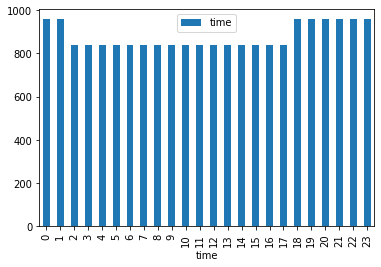

In [11]:
newData.groupby(newData["time"].dt.hour).count().plot(kind="bar")



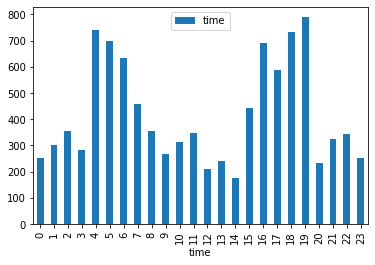

In [57]:
newData.groupby(newData["time"].dt.hour).count().plot(kind="bar")


In [26]:
interrupts

array([   1,  175,  213,  215,  217,  218,  221,  223,  224,  225,  227,
        253,  259,  261,  263,  264,  266,  268,  272,  279,  280,  281,
        287,  288,  290,  291,  295,  296,  297,  307,  309,  310,  327,
        328,  330,  331,  333,  335,  336,  346,  351,  354,  356,  358,
        359,  360,  367,  374,  376,  433,  446,  447,  467,  468,  476,
        495,  498,  503,  505,  506,  508,  544,  547,  548,  557,  559,
        578,  585,  604,  654,  664,  670,  671,  686,  792,  793,  795,
        796,  803,  805,  813,  815,  816,  817,  819,  824,  831,  836,
        838,  841,  851,  857,  858,  861,  863,  865,  886,  906,  908,
        909,  916,  918,  922,  923,  924,  925,  931,  933,  934,  935,
        937,  938,  948,  950,  954,  955,  956,  960,  963,  965,  968,
        970,  972,  973,  975,  983,  987,  994,  999, 1001, 2590, 2625,
       2754, 2944, 2948, 2949, 2951, 2952, 2954, 2959, 2961, 2962, 2964,
       2965, 2968, 2971, 2972, 2975, 2978, 2979, 29

In [73]:
len(epochDF)

3765

In [ ]:
epochNs = 30 * np.timedelta64(1, 's')

interrupts = np.where(epochDF.index.to_series().diff() > epochNs)[0]


In [69]:
epochNs = 30 * np.timedelta64(1, 's')

interrupts = np.where(epochDF.index.to_series().diff() > epochNs)[0]


/apps/eb/skylake/software/Anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
len(interrupts)

461

In [60]:
epochDF

,time,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,xStd,...,vmfft9,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples
0,2013-01-24 20:13:02.033+0800 [Australia/Perth],0.086347,0.130151,-0.371958,0.076767,-0.118901,2.985300,3.590628,4.155263,0.409037,...,0.002933,0.002631,0.004587,0.002091,1.0,900,0,0,0,901
1,2013-01-24 20:13:32.033+0800 [Australia/Perth],0.046060,0.075540,0.272535,0.534350,0.604190,2.977281,2.691767,4.017368,0.307657,...,0.000699,0.000531,0.000404,0.000486,1.0,900,1,0,0,571
2,2013-01-24 20:17:32.033+0800 [Australia/Perth],0.432334,0.434608,-0.348202,-0.035615,1.379296,1.249846,1.370354,1.802385,0.090436,...,0.000016,0.000016,0.000016,0.000016,1.0,900,0,0,0,31
3,2013-01-24 20:18:02.033+0800 [Australia/Perth],0.029655,0.056015,0.246687,0.517066,0.796022,1.440905,1.551959,1.430289,0.091277,...,0.000608,0.000094,0.000266,0.000973,1.0,900,0,0,0,902
4,2013-01-24 20:18:32.033+0800 [Australia/Perth],0.000003,0.005635,0.268082,0.722165,0.628789,0.014927,0.016892,0.014627,0.002996,...,0.000001,0.000001,0.000001,0.000001,1.0,900,1,0,0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,2013-01-31 16:29:32.033+0800 [Australia/Perth],0.000014,0.003764,0.138372,-0.153610,0.974575,0.011942,0.011898,0.008988,0.000659,...,0.000000,0.000000,0.000000,0.000000,1.0,900,1,0,0,61
3761,2013-01-31 16:59:02.033+0800 [Australia/Perth],0.000148,0.004591,0.140144,-0.148487,0.974526,0.067667,0.034253,0.137807,0.004676,...,0.000015,0.000019,0.000026,0.000013,1.0,900,1,0,0,300
3762,2013-01-31 17:04:32.033+0800 [Australia/Perth],0.028896,0.101766,0.074232,-0.041022,0.934097,0.800061,1.139631,0.781111,0.117530,...,0.000826,0.000701,0.000726,0.000430,1.0,900,0,0,0,631
3763,2013-01-31 17:05:02.033+0800 [Australia/Perth],0.000720,0.003942,0.162204,-0.094013,0.979436,0.637918,0.226581,0.381466,0.021155,...,0.000019,0.000021,0.000013,0.000009,1.0,900,1,0,0,451


In [56]:
rawDF

,time,x,y,z
0,2013-01-24 20:13:02.033+0800 [Australia/Perth],-0.069,-0.125,0.963
1,2013-01-24 20:13:02.066+0800 [Australia/Perth],0.138,-0.259,0.937
2,2013-01-24 20:13:02.100+0800 [Australia/Perth],-0.017,-0.186,0.930
3,2013-01-24 20:13:02.133+0800 [Australia/Perth],0.068,-0.364,0.986
4,2013-01-24 20:13:02.166+0800 [Australia/Perth],-0.145,0.136,0.882
...,...,...,...,...
3388495,2013-01-31 17:42:01.866+0800 [Australia/Perth],0.152,-0.090,0.977
3388496,2013-01-31 17:42:01.900+0800 [Australia/Perth],0.152,-0.090,0.977
3388497,2013-01-31 17:42:01.933+0800 [Australia/Perth],0.152,-0.090,0.977
3388498,2013-01-31 17:42:01.966+0800 [Australia/Perth],0.152,-0.090,0.977


In [57]:
times = rawDF.index.to_series()

In [58]:
times

0                0
1                1
2                2
3                3
4                4
            ...   
3388495    3388495
3388496    3388496
3388497    3388497
3388498    3388498
3388499    3388499
Length: 3388500, dtype: int64

In [29]:
non_passDFGen2.iloc[2]

acc_overall_avg                                                               39.0472
errs_interrupts_num                                                               461
file_name                           /well/doherty/projects/raine/gen2_22/gt3x/wris...
generation                                                                       gen2
quality_daylightSavingsCrossover                                                False
quality_goodCalibration                                                          True
quality_goodWearTime                                                            False
interrupts_num_ok                                                               False
acc_overall_avg_ok                                                               True
Name: 3, dtype: object

In [20]:
gen1df_full[(gen1df_full['acc_overall_avg_ok'] & gen1df_full['interrupts_num_ok'] &  gen1df_full['quality_goodWearTime'] & gen1df_full['quality_goodCalibration'])]




,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
0,25.17923,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
2,14.73484,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
3,24.97717,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
4,21.48950,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
5,22.33764,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...
1034,21.27378,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
1035,25.80237,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
1036,24.61728,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True
1037,19.99104,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,True,True


In [123]:
gen1df_full['quality_goodCalibration'].value_counts()

True     1036
False       3
Name: quality_goodCalibration, dtype: int64

In [124]:
gen1df_full['quality_goodWearTime'].value_counts()

True     985
False     54
Name: quality_goodWearTime, dtype: int64

In [125]:
gen1df_full['acc_overall_avg_ok'].value_counts()

True     1033
False       6
Name: acc_overall_avg_ok, dtype: int64

In [126]:
gen1df_full['interrupts_num_ok'].value_counts()

True     1016
False      23
Name: interrupts_num_ok, dtype: int64

In [128]:
gen2df_full['quality_goodCalibration'].value_counts()

True     673
False    217
Name: quality_goodCalibration, dtype: int64

In [129]:
gen2df_full['quality_goodWearTime'].value_counts()

True     539
False    351
Name: quality_goodWearTime, dtype: int64

In [130]:
gen2df_full['acc_overall_avg_ok'].value_counts()

True     887
False      3
Name: acc_overall_avg_ok, dtype: int64

In [131]:
gen2df_full['interrupts_num_ok'].value_counts()

True     638
False    252
Name: interrupts_num_ok, dtype: int64

In [23]:
allDF[~(allDF['acc_overall_avg_ok'] & allDF['interrupts_num_ok'] &  allDF['quality_goodWearTime'] & allDF['quality_goodCalibration'])]

,acc_overall_avg,errs_interrupts_num,file_name,generation,quality_daylightSavingsCrossover,quality_goodCalibration,quality_goodWearTime,interrupts_num_ok,acc_overall_avg_ok
1,30.81626,775,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,False,True
7,33.38676,738,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,False,True
8,4.58692,1,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
31,8.56759,0,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,False,True,True
35,18.32096,698,/well/doherty/projects/raine/gen1_26/gt3x/wris...,gen1,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
883,20.93450,109,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True
884,10.69042,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,False,True,True,True
885,9.71604,0,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,True,True
886,18.71490,87,/well/doherty/projects/raine/gen2_22/gt3x/wris...,gen2,False,True,False,False,True


In [70]:
no_int.iloc[0]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/535007_wrist_2015-08-24.gt3x'

In [84]:
many_int.iloc[0]

acc_overall_avg                                                               30.8163
errs_interrupts_num                                                               775
file_name                           /well/doherty/projects/raine/gen1_26/gt3x/wris...
generation                                                                       gen1
quality_daylightSavingsCrossover                                                False
quality_goodCalibration                                                          True
quality_goodWearTime                                                             True
interrupts_num_ok                                                               False
acc_overall_avg_ok                                                               True
Name: 1, dtype: object

In [101]:
many_int.iloc[120]

acc_overall_avg                                                               32.4325
errs_interrupts_num                                                               569
file_name                           /well/doherty/projects/raine/gen2_22/gt3x/wris...
generation                                                                       gen2
quality_daylightSavingsCrossover                                                False
quality_goodCalibration                                                          True
quality_goodWearTime                                                             True
interrupts_num_ok                                                               False
acc_overall_avg_ok                                                               True
Name: 312, dtype: object

In [99]:
many_int.iloc[120]['file_name']

'/well/doherty/projects/raine/gen2_22/gt3x/wrist/595524_wrist_2014-02-04.gt3x'

In [86]:
many_int.iloc[2]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/528922_wrist_2016-08-08.gt3x'

In [85]:
many_int.iloc[1]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/455217_wrist_2016-08-30.gt3x'

In [60]:
many_int.iloc[0]['file_name']

'/well/doherty/projects/raine/gen1_26/gt3x/wrist/843822_wrist_2016-08-30.gt3x'

In [69]:
many_int = allDF[allDF['interrupts_num_ok'] == False]
no_int = allDF[allDF['interrupts_num_ok'] == True]

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.hist(many_int['errs_interrupts_num'])
plt.show()


NameError: name 'many_int' is not defined

In [53]:
many_int['errs_interrupts_num']

1      775
7      738
35     698
53     613
153    582
      ... 
874    105
878    108
882    204
883    109
886     87
Name: errs_interrupts_num, Length: 275, dtype: int64

In [ ]:
# construct the table the includes all the quality information abo
# see the difference between gen1 and gen2

In [ ]:
# check how many didn't finish processing succesfully 
log_dir = '/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/clusterLogs'


['enmoTrunc', 'xRange', 'yRange', 'zRange', 'xStd', 'yStd', 'zStd', 'temp', 'samples', 'dataErrors', 'clipsBeforeCalibr', 'clipsAfterCalibr', 'rawSamples']


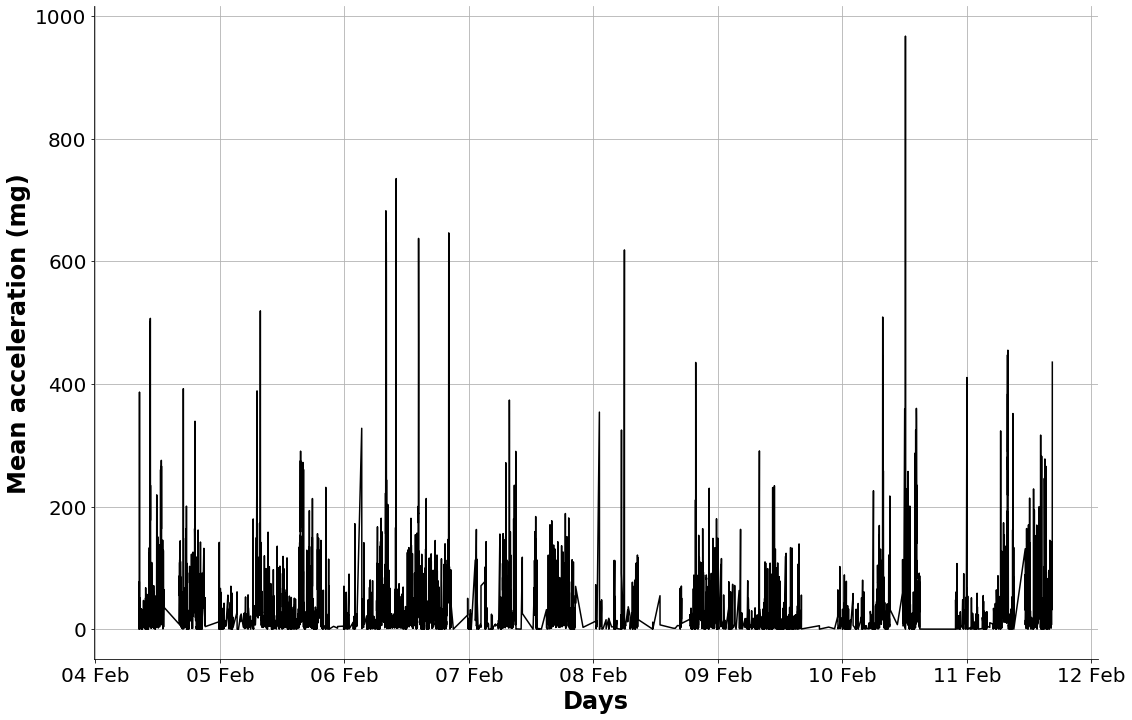

In [100]:

my_csv_path ='/well/doherty/projects/raine/gen2_22/gt3x/wrist/baseline_oct8/epoch/595524_wrist_2014-02-04-epoch.csv.gz'


#my_csv_path = '~/Documents/770757_wrist_2017-04-11-epoch.csv'
e = pd.read_csv(my_csv_path, index_col=0, parse_dates=['time'], compression='gzip').sort_index()
cols = ['enmoTrunc','xRange','yRange','zRange']                             
cols += ['xStd','yStd','zStd','temp','samples']                             
cols += ['dataErrors','clipsBeforeCalibr','clipsAfterCalibr','rawSamples']
# e.columns = cols
print(cols)
e = e[cols]
x = e.index                                                         
y = e['enmoTrunc']*1000                                                       

f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
my_dates = e.index
# f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
# my_x = list(map(f, my_dates))
my_x = list(map(f, my_dates))

fig,ax = plt.subplots(1,1,sharex=False, sharey=False, figsize=(18,12))          
ax.grid(True)                                                  
ax.plot(my_x, y, color='black', label='lab')                                       



#ax.set_title('titleLabel', fontsize=16, fontweight='bold')                        
#format x-axis                                                                  
#ax.set_xlabel(xLabel, fontsize=16, fontweight='bold')                           
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))                                 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))                     
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3))                                
ax.tick_params(axis='x', which='major', labelsize=20, grid_visible=True)      

# loc = matplotlib.ticker.FixedLocator(matplotlib.dates.date2num(my_x))
# fmt = matplotlib.dates.DateFormatter('%d-%b')
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(fmt)
# plt.gcf().auto

#format y-axis                                                                  
ax.tick_params(axis='y', which='major', labelsize=20)                           
#ax.set_ylim(-100,500)                                                           
#format plot area                                                               
ax.spines['right'].set_visible(False)                                           
ax.spines['top'].set_visible(False)                                             
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left')                                             
                                                                                
#defined shared y-axis                                                          
ax.set_ylabel('Mean acceleration (mg)', fontsize=24, fontweight='bold')   
ax.set_xlabel('Days', fontsize=24, fontweight='bold')                           

plt.savefig('test.png')
plt.show() 

['enmoTrunc', 'xRange', 'yRange', 'zRange', 'xStd', 'yStd', 'zStd', 'temp', 'samples', 'dataErrors', 'clipsBeforeCalibr', 'clipsAfterCalibr', 'rawSamples']


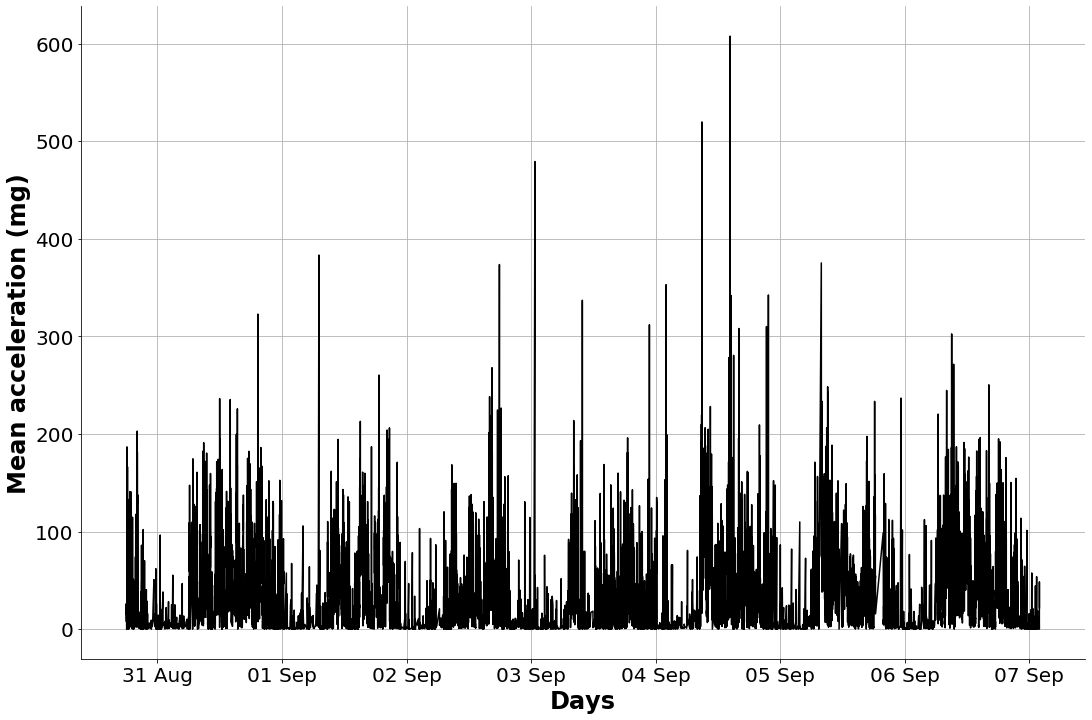

In [82]:

my_csv_path ='/well/doherty/projects/raine/gen1_26/gt3x/wrist/baseline_oct8/epoch/843822_wrist_2016-08-30-epoch.csv.gz'


#my_csv_path = '~/Documents/770757_wrist_2017-04-11-epoch.csv'
e = pd.read_csv(my_csv_path, index_col=0, parse_dates=['time'], compression='gzip').sort_index()
cols = ['enmoTrunc','xRange','yRange','zRange']                             
cols += ['xStd','yStd','zStd','temp','samples']                             
cols += ['dataErrors','clipsBeforeCalibr','clipsAfterCalibr','rawSamples']
# e.columns = cols
print(cols)
e = e[cols]
x = e.index                                                         
y = e['enmoTrunc']*1000                                                       

f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
my_dates = e.index
# f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
# my_x = list(map(f, my_dates))
my_x = list(map(f, my_dates))

fig,ax = plt.subplots(1,1,sharex=False, sharey=False, figsize=(18,12))          
ax.grid(True)                                                  
ax.plot(my_x, y, color='black', label='lab')                                       



#ax.set_title('titleLabel', fontsize=16, fontweight='bold')                        
#format x-axis                                                                  
#ax.set_xlabel(xLabel, fontsize=16, fontweight='bold')                           
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))                                 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))                     
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3))                                
ax.tick_params(axis='x', which='major', labelsize=20, grid_visible=True)      

# loc = matplotlib.ticker.FixedLocator(matplotlib.dates.date2num(my_x))
# fmt = matplotlib.dates.DateFormatter('%d-%b')
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(fmt)
# plt.gcf().auto

#format y-axis                                                                  
ax.tick_params(axis='y', which='major', labelsize=20)                           
#ax.set_ylim(-100,500)                                                           
#format plot area                                                               
ax.spines['right'].set_visible(False)                                           
ax.spines['top'].set_visible(False)                                             
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left')                                             
                                                                                
#defined shared y-axis                                                          
ax.set_ylabel('Mean acceleration (mg)', fontsize=24, fontweight='bold')   
ax.set_xlabel('Days', fontsize=24, fontweight='bold')                           

plt.savefig('test.png')
plt.show() 

['enmoTrunc', 'xRange', 'yRange', 'zRange', 'xStd', 'yStd', 'zStd', 'temp', 'samples', 'dataErrors', 'clipsBeforeCalibr', 'clipsAfterCalibr', 'rawSamples']


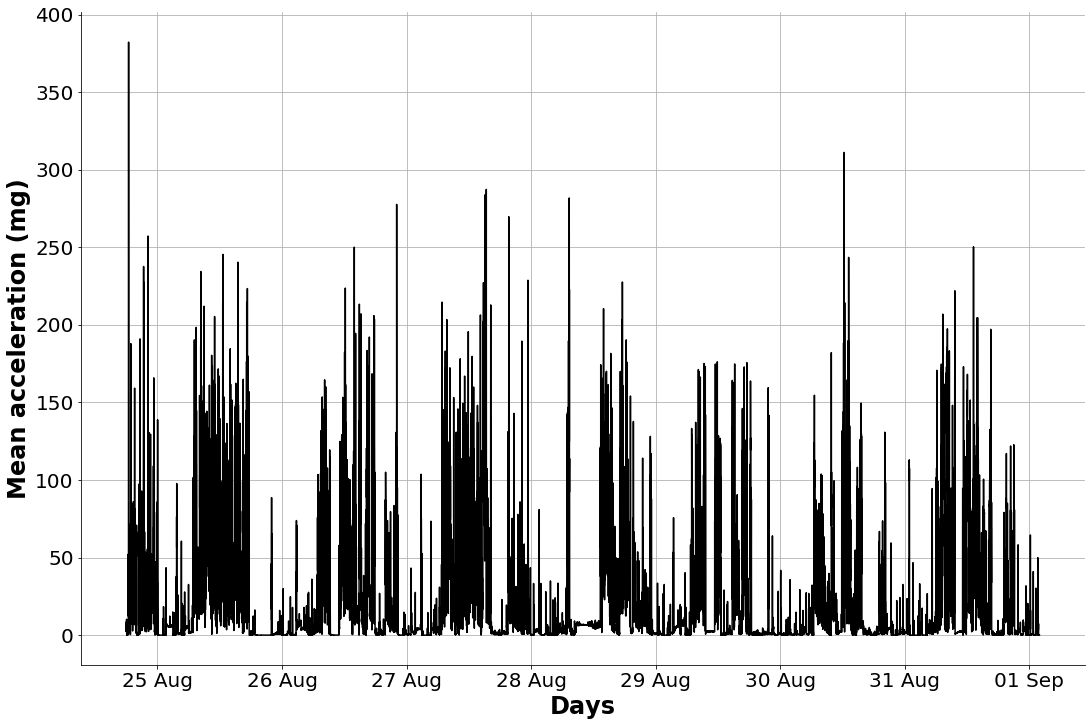

In [83]:
import matplotlib.dates as mdates   
import matplotlib.pyplot as plt
import matplotlib.dates
import matplotlib.ticker
import datetime


my_csv_path ='/well/doherty/projects/raine/gen1_26/gt3x/wrist/baseline_oct8/epoch/535007_wrist_2015-08-24-epoch.csv.gz'


#my_csv_path = '~/Documents/770757_wrist_2017-04-11-epoch.csv'
e = pd.read_csv(my_csv_path, index_col=0, parse_dates=['time'], compression='gzip').sort_index()
cols = ['enmoTrunc','xRange','yRange','zRange']                             
cols += ['xStd','yStd','zStd','temp','samples']                             
cols += ['dataErrors','clipsBeforeCalibr','clipsAfterCalibr','rawSamples']
# e.columns = cols
print(cols)
e = e[cols]
x = e.index                                                         
y = e['enmoTrunc']*1000                                                       

f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
my_dates = e.index
# f = lambda s: datetime.datetime.strptime(s[0:19], '%Y-%m-%d %H:%M:%S')
# my_x = list(map(f, my_dates))
my_x = list(map(f, my_dates))

fig,ax = plt.subplots(1,1,sharex=False, sharey=False, figsize=(18,12))          
ax.grid(True)                                                  
ax.plot(my_x, y, color='black', label='lab')                                       



#ax.set_title('titleLabel', fontsize=16, fontweight='bold')                        
#format x-axis                                                                  
#ax.set_xlabel(xLabel, fontsize=16, fontweight='bold')                           
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))                                 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))                     
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3))                                
ax.tick_params(axis='x', which='major', labelsize=20, grid_visible=True)      

# loc = matplotlib.ticker.FixedLocator(matplotlib.dates.date2num(my_x))
# fmt = matplotlib.dates.DateFormatter('%d-%b')
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(fmt)
# plt.gcf().auto

#format y-axis                                                                  
ax.tick_params(axis='y', which='major', labelsize=20)                           
#ax.set_ylim(-100,500)                                                           
#format plot area                                                               
ax.spines['right'].set_visible(False)                                           
ax.spines['top'].set_visible(False)                                             
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left')                                             
                                                                                
#defined shared y-axis                                                          
ax.set_ylabel('Mean acceleration (mg)', fontsize=24, fontweight='bold')   
ax.set_xlabel('Days', fontsize=24, fontweight='bold')                           

plt.savefig('test.png')
plt.show() 

In [65]:
# get the distribution for firmware

In [11]:
import glob
import zipfile

file_desp1 = '/well/doherty/users/cxx579/project_data/raine/gen1_26/gt3x/wrist/*.gt3x'

file_desp2 = '/well/doherty/projects/raine/gen1_26/gt3x/wrist/*.gt3x'
gen1_tmp = '/well/doherty/projects/raine/gen1_26/gt3x/wrist/tmp'
txt_dir = gen1_tmp + '/info.txt'
file_list = glob.glob(file_desp2)

In [13]:
def getFirmWare(file_lines):
    for line in Lines:
        str_segs = line.split(':')
        if str_segs[0] == 'Firmware':
            return str_segs[1]
    return " "

In [ ]:
firm_wares = []
i = 0
for c_file in file_list:
    i += 1
    with zipfile.ZipFile(c_file, 'r') as zip_ref:
        zip_ref.extractall(gen1_tmp)
    if i % 20 == 0:
        print(i)
    file1 = open(txt_dir, 'r')
    Lines = file1.readlines()
    firm_wares.append(getFirmWare(Lines))


20
40
60
80
100
120


In [ ]:
mydata = {"file_name": file_list,
     "firm_ware": firm_wares}
mydf = pd.DataFrame(mydata)

In [ ]:
mydf.to_csv('/well/doherty/users/cxx579/project_data/raine/gen1_26/gt3x/wrist/firmwaregen1.csv')

In [ ]:
mydf

In [ ]:
fw_df2= gen2df_full.join(mydf.set_index('file_name'), on='file_name')

In [ ]:
select_df = fw_df2[['errs_interrupts_num', 'firm_ware']]

In [ ]:
DFManyInts = select_df[select_df['errs_interrupts_num'] > 10]
DFFewInts = select_df[select_df['errs_interrupts_num'] <= 10]


In [33]:
select_df['firm_ware'].v

AttributeError: 'DataFrame' object has no attribute 'valu'